## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации. 
нужно изучить рынок российского кинопроката и выявить текущие тренды. 
Уделив внимание фильмам, которые получили государственную поддержку. 

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd

data=pd.read_csv('/datasets/mkrf_movies.csv')

In [2]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

открыли датафрейм mkrf_movies и сохранили его в data_, узнали тип данных столбцов

In [4]:
data_pr=pd.read_csv('/datasets/mkrf_shows.csv')

In [5]:
data_pr.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [6]:
data_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


открыли датафрейм mkrf_shows.csv и сохранили его в data_pr, узнали тип данных столбцов

In [7]:
data[data['puNumber'] == "нет"] =  0

In [8]:
data['puNumber'] = data['puNumber'].astype('int')

In [9]:
data_pr.query('puNumber == 0').count()

puNumber      0
box_office    0
dtype: int64

 заменил значение в puNumber датафрейма data, равное "нет" на 0, для дальнейшего приведения типа puNumber в int. убедился что в data_pr нет puNumber == 0 

In [10]:
data=data.merge(data_pr, on='puNumber', how='left')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     333 non-null    float64
 10  nonrefundable_support  333 non-null    float64
 11  budget                 333 non-null    float64
 12  financing_source       333 non-null    object 
 13  ratings                6520 non-null   object 
 14  genres                 6511 non-null   object 
 15  box_

In [12]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Наша новая объединенная таблица

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     333 non-null    float64
 10  nonrefundable_support  333 non-null    float64
 11  budget                 333 non-null    float64
 12  financing_source       333 non-null    object 
 13  ratings                6520 non-null   object 
 14  genres                 6511 non-null   object 
 15  box_

In [14]:
data['show_start_date'].value_counts()

2010-12-17T12:00:00.000Z    96
2014-12-01T12:00:00.000Z    71
2014-12-24T12:00:00.000Z    61
2016-06-07T12:00:00.000Z    41
2013-12-19T12:00:00.000Z    39
                            ..
2010-10-21T12:00:00.000Z     1
2019-02-18T12:00:00.000Z     1
2015-07-02T12:00:00.000Z     1
2018-12-14T12:00:00.000Z     1
2014-07-23T12:00:00.000Z     1
Name: show_start_date, Length: 1965, dtype: int64

Преобразуем show_start_date в формат даты, ratings - в float

In [15]:
data.loc[data['show_start_date'] == "Прочие",'show_start_date'] = "1800-1-1T12:00:00.000Z"

In [16]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], utc=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     333 non-null    float64            
 10  nonrefundable_support  333 non-null    float64            
 11  budget                 333 non-null    float64          

In [18]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', 0, '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [19]:
def rating_fix(row):
    rating = row['ratings']
    if pd.isna(rating):
        return '0.0'
    #функция isinstance возвращает true если первый аргумент равен типу данных из второго аргумента
    if isinstance(rating, str) and '.' in rating:
        return rating
    
    if isinstance(rating, str) and rating.endswith('%'):
        percent = float(rating[:-1])  # убираем символ '%'
        return f"{percent / 10:.1f}"  # преобразуем в формат
    
    if isinstance(rating,int) or isinstance(rating, float):
        return rating
    
data['ratings'] = data.apply(rating_fix,axis = 1)

In [20]:
data['ratings'] = data['ratings'].astype('float')

In [21]:
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, 0. , 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

Поменял тип данных в ratings, предварительно преобразовав значения из процентного в формат десятибальной шкалы. также заполнил пропуск 0, т.к это не сильно повлияет на выборку

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [22]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                     0
genres                    975
box_office               4328
dtype: int64

в прошлом шаге заполнил пропуск в ratings.
                                                        

в столбцах refundable_support nonrefundable_support budget  - есть информация только про фильмы с гос поддержкой
стобец producer, genres, film_studio,production_country,director  мы не можем сами заполнить

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [23]:
duplicates_full = data.duplicated().sum()
duplicates_full

0

In [24]:
duplicates_puNumber = data[data.duplicated(subset='puNumber', keep= False) ]
duplicates_puNumber


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


эти строки не являются дублями, два последних фильма - разные. видимо произошла ошибка при заполнении таблицы

In [25]:
duplicates_title = data.duplicated(subset='title').sum()
duplicates_title

714

In [26]:
data[data.duplicated(subset='title', keep= False) ]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.7,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,"триллер,драма",175003.51
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


In [27]:
data= data.drop_duplicates(subset='title').reset_index()

In [28]:
duplicates_title = data.duplicated(subset='title').sum()
duplicates_title

0

Удалены дубликаты с названиями фильмов

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [29]:
data['type'].value_counts()

Художественный                3929
 Художественный               1350
Анимационный                   766
Прочие                         390
Документальный                 282
Научно-популярный               52
0                                1
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

Встречаются пробелы в названии type и из-за этого появляются неявные дубликаты


In [30]:
data['type'] = data['type'].str.strip() 

In [31]:
data.loc[data['type'] == 0, 'type'] = 'Прочие'

In [32]:
data['type'].value_counts()

Художественный                5279
Анимационный                   767
Прочие                         390
Документальный                 282
Научно-популярный               52
Музыкально-развлекательный       1
Name: type, dtype: int64

Удалил все лишние пробелы из названий "Художественный" и "Анимационный", также в строке где жанр = 0 приравнял к "Прочие

In [33]:
data['genres'].value_counts()

драма                         448
комедия                       329
мелодрама,комедия             181
драма,мелодрама               170
драма,мелодрама,комедия       167
                             ... 
драма,фантастика,ужасы          1
короткометражка,фантастика      1
мелодрама,драма,музыка          1
драма,мелодрама,триллер         1
0                               1
Name: genres, Length: 743, dtype: int64

общая проблема - запись через запятую множества повторяющихся значений почти во всех категориальных столбцах. далее по заданию мы выберем первый из жанров и режиссера

In [34]:
data['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2513
«12+» - для детей старше 12 лет           1479
«18+» - запрещено для детей               1427
«0+» - для любой зрительской аудитории     749
«6+» - для детей старше 6 лет              603
0                                            1
Name: age_restriction, dtype: int64

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [35]:
data.query('budget<(refundable_support+ nonrefundable_support )')

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1872,2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
1877,2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2254,2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2312,2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2386,2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2448,2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2544,2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2624,2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
2789,3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3279,3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


In [36]:
data.loc[(data['budget']<data['refundable_support'] + data['nonrefundable_support']), 'budget'] = data['refundable_support'] + data['nonrefundable_support']

In [37]:
data.query('budget<(refundable_support+ nonrefundable_support )')

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


добавили условие, при котором, если бюджет < суммы гос поддержки, бюджет приравнивался бы к сумме господдержки

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6772 entries, 0 to 6771
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   index                  6772 non-null   int64              
 1   title                  6772 non-null   object             
 2   puNumber               6772 non-null   int64              
 3   show_start_date        6772 non-null   datetime64[ns, UTC]
 4   type                   6771 non-null   object             
 5   film_studio            6755 non-null   object             
 6   production_country     6770 non-null   object             
 7   director               6763 non-null   object             
 8   producer               6213 non-null   object             
 9   age_restriction        6772 non-null   object             
 10  refundable_support     330 non-null    float64            
 11  nonrefundable_support  330 non-null    float64          

In [39]:
data['show_start_year'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [40]:
def main_director_value(row): # функция преобразует ячейку дф в список и возвращает первый элемент
    if pd.isna(row['director']):
        return None
    directors = str(row['director']).split(',')
    return directors[0]
data['main_director'] = data.apply(main_director_value,axis = 1)

In [41]:
def main_genre_value(row): # функция преобразует ячейку дф в список и возвращает первый элемент
    if pd.isna(row['genres']):
        return None
    genres_list = str(row['genres']).split(',')
    return genres_list[0]
data['main_genre'] = data.apply(main_genre_value,axis = 1)

In [42]:
data[50:100]

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre
50,53,Алешкина любовь,111010813,2013-12-19 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Семен Туманов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.1,"драма,мелодрама,комедия",NaN,2013,Семен Туманов,драма
51,54,50 первых поцелуев,221004416,2016-02-09 12:00:00+00:00,Художественный,"Коламбиа Пикчерз, Хэппи Медисон Продакшнз, Фла...",США,Питер Сигал,"Бини Барнс, Джозеф Дрэйк, Джон Линсон",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.3,"комедия,мелодрама,драма",NaN,2016,Питер Сигал,комедия
52,55,Адмирал Ушаков,111010413,2013-12-19 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Ромм,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.9,"драма,биография,история",NaN,2013,М.Ромм,драма
53,56,А был ли Каротин?,111029514,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Г.Полока,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN,2014,Г.Полока,комедия
54,57,А если это любовь?,111010213,2013-12-19 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Райзман,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN,2013,Ю.Райзман,драма
55,58,Бесшабашное ограбление,221072814,2014-12-29 12:00:00+00:00,Художественный,"Нью Маркет, Саммит Интертейнмент, Рэйвинг Мэд ...",США,"Дрю Дэйуолт, Дэвид Шнейдер","Джон Балдеччи, Лоуренс Бендер, Кристофер Болл",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.1,"боевик,комедия,криминал",NaN,2014,Дрю Дэйуолт,боевик
56,59,Бешеное золото,111011613,2013-12-19 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,С.Самсонов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.3,"комедия,криминал",NaN,2013,С.Самсонов,комедия
57,60,Братец медвежонок /По одноименному произведени...,224029312,2012-11-19 12:00:00+00:00,Анимационный,"Уолт Дисней Пикчерз, Буена Виста Интернэшнл",США,"Айрон Блейз, Роберт Уокер",Чак Уильямс,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"мультфильм,фэнтези,комедия",NaN,2012,Айрон Блейз,мультфильм
58,61,Американская дочь,111005515,2015-04-23 12:00:00+00:00,Художественный,"АО ""Караван"", Компания ""Америкен Дистрибьюшн"",...","Россия, Казахстан, США",К.Шахназаров,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.0,"драма,комедия",300.0,2015,К.Шахназаров,драма
59,62,Беспредел _,111006515,2015-04-23 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"" , Студия ""Ритм""",СССР,И.Гостев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.8,"драма,криминал",NaN,2015,И.Гостев,драма


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [43]:
data['gov_share'] = round((data['refundable_support']+ data['nonrefundable_support']) / data['budget'], 2) 
# добавил round для красивого формата вывода

In [44]:
data['gov_share'].value_counts()

0.65    26
0.66    25
0.70    22
1.00    17
0.67    17
        ..
0.07     1
0.18     1
0.08     1
0.20     1
0.09     1
Name: gov_share, Length: 62, dtype: int64

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [45]:
import matplotlib.pyplot as plt

In [46]:
data.sort_values(by='show_start_date',ascending = False)

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,gov_share
6771,7485,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,...,NaN,NaN,NaN,6.3,"комедия,вестерн",NaN,2019,И.Трусов,комедия,NaN
6770,7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,...,NaN,NaN,NaN,0.0,NaN,NaN,2019,А.Беляев,None,NaN
6769,7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,...,NaN,NaN,NaN,0.0,NaN,NaN,2019,Чарльз Е.Бастьен,None,NaN
6754,7467,Жёлтый клевер,111022219,2019-12-27 12:00:00+00:00,Художественный,Соломатина Людмила Леонидовна,Россия,Л.Соломатина (Томилова),Л.Соломатина (Томилова),«12+» - для детей старше 12 лет,...,NaN,NaN,NaN,0.0,NaN,NaN,2019,Л.Соломатина (Томилова),None,NaN
6765,7479,Эколав,111023219,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,...,NaN,NaN,NaN,0.0,NaN,NaN,2019,Д.Григорьев,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3664,3962,Небесный тихоход (новая цветная версия),111000110,2010-01-14 12:00:00+00:00,Художественный,"Киностудия ""Ленфильм"", ЗАО ""Киновидеообъединен...","СССР, Россия",И.Цветов (режиссер ч/б фильма - С.Тимошенко),"ЗАО ""Киновидеообъединение ""Крупный план""",«0+» - для любой зрительской аудитории,...,NaN,NaN,NaN,8.0,"комедия,военный",NaN,2010,И.Цветов (режиссер ч/б фильма - С.Тимошенко),комедия,NaN
4078,4466,Последний король Шотландии,221002410,2010-01-13 12:00:00+00:00,Художественный,"Дэ Эн А Филмз, Фокс Серчлайт Пикчерз, Филм Фо,...",Великобритания - США,Кевин МакДональд,"Лиза Брайер, Андреа Колдервуд, Кристин Рупперт...",«16+» - для детей старше 16 лет,...,NaN,NaN,NaN,7.7,"триллер,драма,биография",NaN,2010,Кевин МакДональд,триллер,NaN
3975,4332,Вечный зов.,213000210,2010-01-13 12:00:00+00:00,Художественный,"ОАО ""Леннаучфильм""",Россия,"В.Ефремов, И.Ефремова, В.Лопач",В.Бажин,«0+» - для любой зрительской аудитории,...,NaN,NaN,NaN,8.3,драма,NaN,2010,В.Ефремов,драма,NaN
4068,4456,Книга Илая,121000210,2010-01-11 12:00:00+00:00,Художественный,"Элкон Интертейнмент, Силвер Пикчерз",США,"Алберт Хьюз, Эллен Хьюз","Бродерик Джонсон, Джоэл Силвер",«16+» - для детей старше 16 лет,...,NaN,NaN,NaN,7.1,"фантастика,боевик,драма",NaN,2010,Алберт Хьюз,фантастика,NaN


<AxesSubplot:>

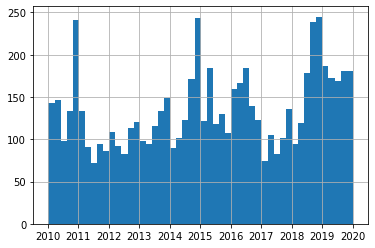

In [47]:
data['show_start_date'].hist(
    bins=50,
    range=(
        pd.to_datetime('2010-01-11 12:00:00+00:00'),
        pd.to_datetime('2019-12-30 12:00:00+00:00')
    )
)

сделали выборку с 2010 и 2019 года, по резултатам сортировки выше.
наиболее 
наблюдаем пик в 2011 году, 2015 и 2019 году

In [48]:
data['box_office'].notna().sum()/data['title'].count()

0.44551092734790315

отношение фильмов с данными о прокате к общему числу фильмов

In [59]:
data.groupby('show_start_year')[

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [73]:
data['has_sup'] = data['nonrefundable_support'] + data['refundable_support']>0
support_by_year = data.groupby('show_start_year')['has_sup'].agg(['count', 'sum'])
support_by_year = support_by_year.rename(columns={ "count":"total", "sum" : "with_sup"})
support_by_year

,total,with_sup
show_start_year,,
1970,1,0
2010,762,0
2011,477,0
2012,517,0
2013,590,2
2014,729,16
2015,661,86
2016,771,61
2017,498,41


<AxesSubplot:xlabel='show_start_year'>

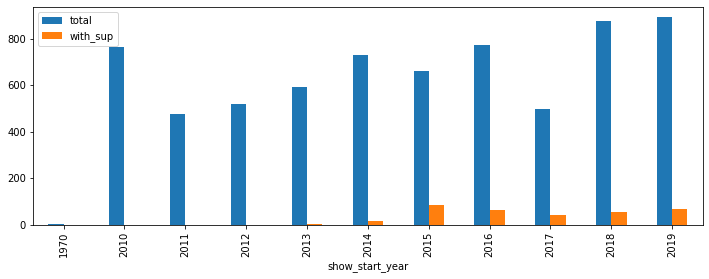

In [74]:
support_by_year.plot(kind = 'bar', figsize = (12,4))

наблюдаем рост фильмов с гос поддержкой с 2013 по2015 год, коррекцию с 2015 до 2017 и последущий рост

максимальной сумма сборов была в 2018 году, а минимальной в 2010 среди выборки с 2010 по 2020 год 

ниже представлен график кассовых сборов по годам, сначала общий, далее с 2010 по 2013 и с 2014 по 2020

(2010.0, 2020.0)

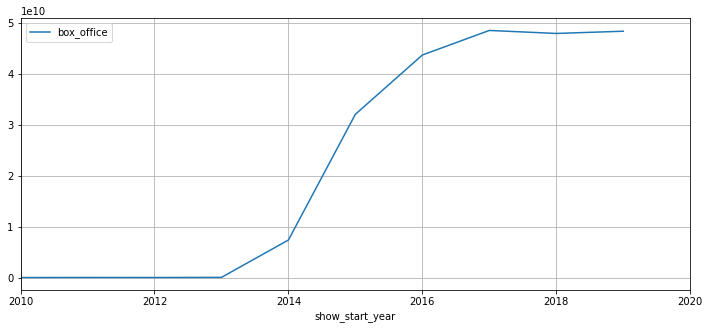

In [76]:
data.pivot_table(index='show_start_year', values='box_office', aggfunc='sum').plot(grid=True, figsize=(12, 5))
plt.xlim(2010,2020)

(0.0, 100000000.0)

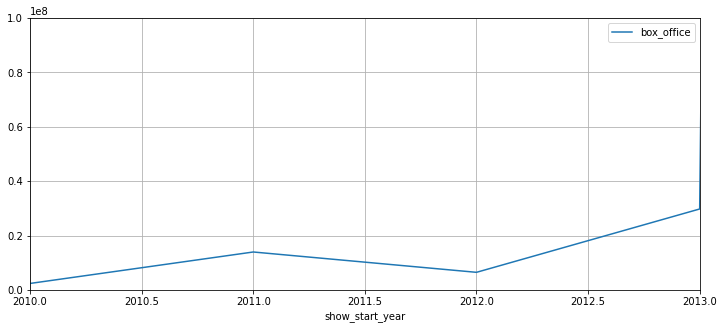

In [80]:
data.pivot_table(index='show_start_year', values='box_office', aggfunc='sum').plot(grid=True, figsize=(12, 5))
plt.xlim(2010,2013)
plt.ylim(0,100000000)

(2014.0, 2020.0)

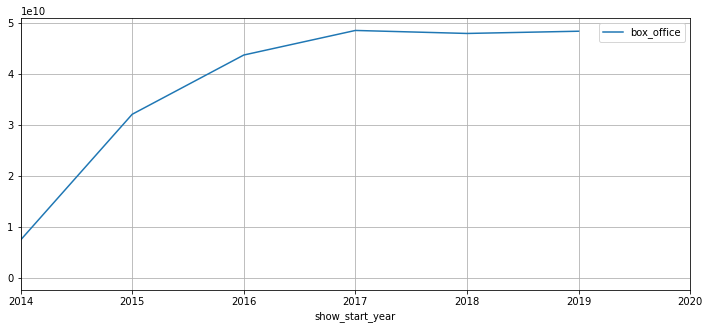

In [81]:
data.pivot_table(index='show_start_year', values='box_office', aggfunc='sum').plot(grid=True, figsize=(12, 5))
plt.xlim(2014,2020)


In [ ]:
По общей сумме сборов мы видим постоянную тенденцию к росту кассовых сборов

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

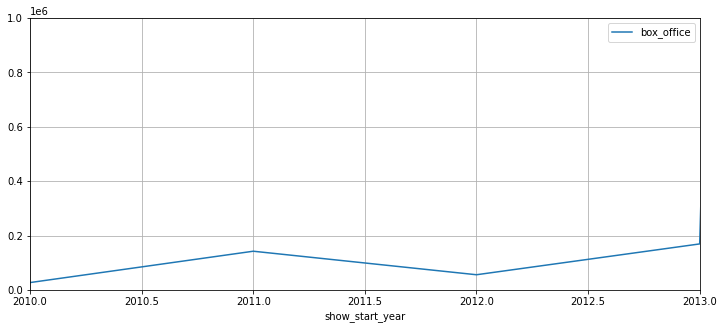

In [50]:
data.pivot_table(index='show_start_year', values='box_office', aggfunc='mean').plot(grid=True, figsize=(12, 5))
plt.xlim(2010, 2013)
plt.ylim(0,1000000)
plt.show()

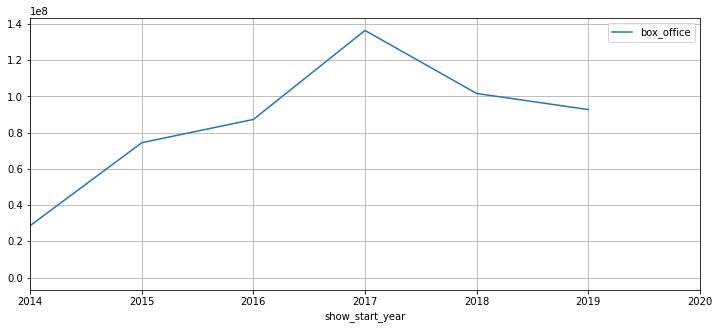

In [51]:
data.pivot_table(index='show_start_year', values='box_office', aggfunc='mean').plot(grid=True, figsize=(12, 5))
plt.xlim(2014, 2020)
plt.show()

средняя сумма сборов по годам

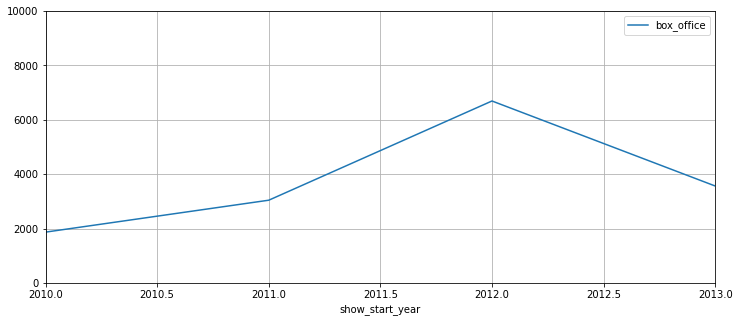

In [52]:
data.pivot_table(index='show_start_year', values='box_office', aggfunc='median').plot(grid=True, figsize=(12, 5)) 
plt.xlim(2010, 2013)
plt.ylim(0,10000)
plt.show()

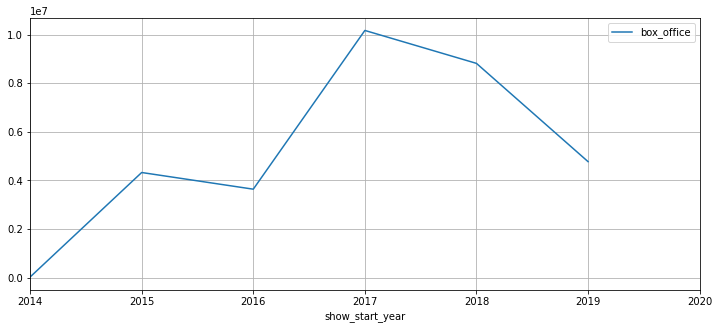

In [53]:
data.pivot_table(index='show_start_year', values='box_office', aggfunc='median').plot(grid=True, figsize=(12, 5))
plt.xlim(2014, 2020)
plt.show()

медианная сумма сборов 

и медианная и средняя сумма была разбита на 2 выборки с 2010 по 2013 и 2014 по 2020

Прослеживается рост у медианной и у средней суммы с 2010 по 2017, далее наблюдается коррекция, но общая сумма сборов не упала, из чего можно сделать вывод, что в кинотаетры стало ходить больше 

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

<AxesSubplot:xlabel='show_start_year'>

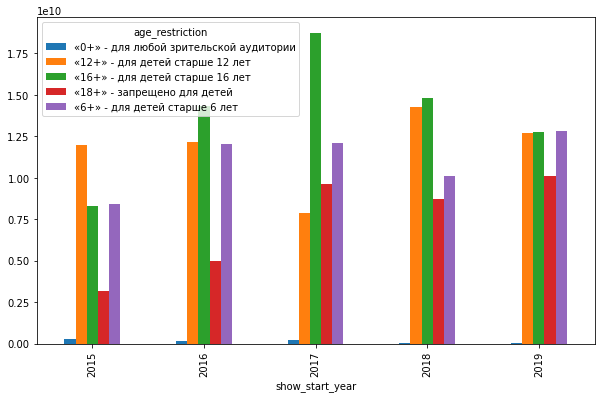

In [54]:
data.query('show_start_year >= 2015').pivot_table(index='show_start_year',columns='age_restriction', values='box_office', aggfunc='sum').plot(kind='bar', figsize=(10, 6))

возрастное ограничение - влияет. самым непопулярным является 0+, самым успешным 16+. 
картина существенно меняется в 2019 году, когда практически все ограничения сравнялись(кроме 0+). 

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

<AxesSubplot:xlabel='show_start_year'>

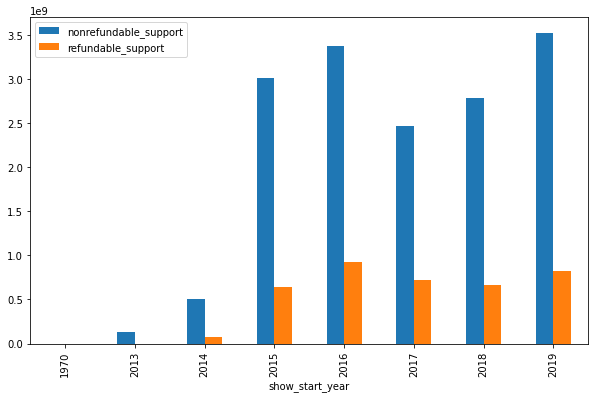

In [55]:
data[data['financing_source'].isna() == False].pivot_table(
    index='show_start_year',values=('refundable_support', 'nonrefundable_support'), aggfunc='sum').plot(
    kind='bar', figsize=(10, 6))

сумма денег выделяемая государством на поддержку

<AxesSubplot:xlabel='show_start_year'>

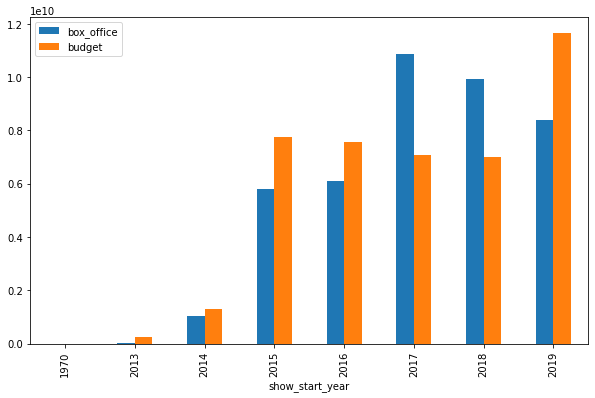

In [56]:
data[data['financing_source'].isna() == False].pivot_table(
    index='show_start_year',values=('box_office', 'budget'), aggfunc='sum').plot(
    kind='bar', figsize=(10, 6))

окупаемость фильмов учитвая всю поддержку

<AxesSubplot:xlabel='show_start_year'>

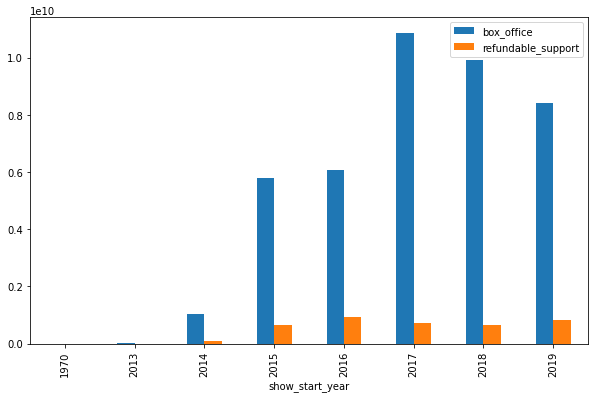

In [57]:
data[data['financing_source'].isna() == False].pivot_table(
    index='show_start_year',values=('box_office', 'refundable_support'), aggfunc='sum').plot(
    kind='bar', figsize=(10, 6))

окупаемсоть учитывая только возвратную поддержку

<AxesSubplot:xlabel='show_start_year'>

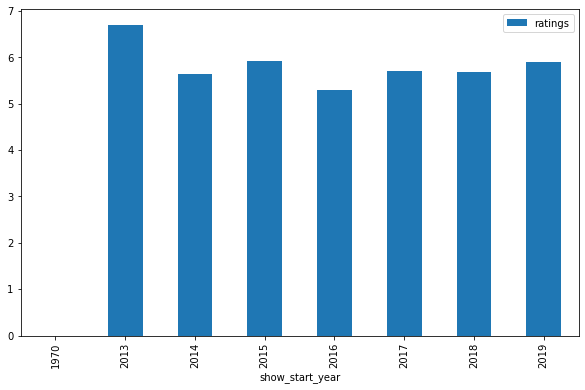

In [58]:
data[data['financing_source'].isna() == False].pivot_table(
    index='show_start_year',values=('ratings'), aggfunc='mean').plot(
    kind='bar', figsize=(10, 6))

средний рейтинг по фильмам с поддержкой

### Шаг 5. Напишите общий вывод

Сборный аналитический кейс решен.
Я проверил типы данных в датафрейме и преобразовал их там, где это было необходимо.

Я изучил пропуски в датафрейме и объяснил, почему заполнил их определённым образом или почему решил не делать этого.

Я проверил, есть ли в данных дубликаты, и описал возможные причины их появления.

Я изучил столбцы с категориальными значениями:

Определил общую проблему, которая встречалась почти во всех категориальных столбцах;

Исправил проблемные значения в поле type.

Я проанализировал столбцы с количественными значениями и проверил, есть ли в них подозрительные данные. Затем я решил, как лучше поступить с такими данными.

Я добавил новые столбцы:

Создал столбец с годом проката, выделив его из даты премьеры фильма;

Добавил два столбца: с именем и фамилией главного режиссёра и основным жанром фильма (взял первые значения из списков);

Посчитал долю государственной поддержки от общего бюджета фильма.

Я посмотрел, сколько фильмов выходило в прокат каждый год. Учёл, что данные о прокате известны не для всех фильмов, и посчитал долю фильмов с указанной информацией. Затем я проанализировал, как эта доля менялась по годам, и сделал вывод о том, какой период представлен наиболее полно.

Я изучил динамику проката по годам и определил, в каком году сумма сборов была минимальной, а в каком — максимальной.

С помощью сводной таблицы я посчитал среднюю и медианную сумму сборов для каждого года, сравнил значения и сделал выводы.

Я проверил, влияет ли возрастное ограничение («6+», «12+», «16+», «18+» и т. д.) на сборы фильмов в период с 2015 по 2019 год. Определил, фильмы с каким рейтингом собрали больше всего денег, и выяснил, меняется ли картина в зависимости от года. Если да, то предположил возможные причины.

Проверил, сколько средств выделяется на поддержку кино;

Оценил, насколько хорошо окупаются такие фильмы и какой у них рейтинг.